In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [6]:
dataset = pd.read_csv('ETH.csv', index_col='time', parse_dates=True)

In [7]:
dataset.drop(['id'], axis=1, inplace=True)
dataset.head(100)

,open,close,high,low,volume
time,,,,,
2021-09-06,3952.1,3927.20,3973.2,3882.50,50207.34
2021-09-05,3885.3,3952.10,3982.0,3833.80,39134.52
2021-09-04,3938.1,3884.40,3969.8,3835.00,23300.34
2021-09-03,3787.6,3938.30,4027.9,3710.00,57443.89
2021-09-02,3826.5,3787.60,3837.0,3723.89,34933.13
...,...,...,...,...,...
2021-05-20,2446.5,2773.90,2989.9,2160.30,263296.63
2021-05-19,3378.6,2441.30,3442.9,2033.70,714855.30
2021-05-18,3283.5,3378.60,3563.8,3238.60,121126.94


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2021-09-06 to 2020-04-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    500 non-null    float64
 1   close   500 non-null    float64
 2   high    500 non-null    float64
 3   low     500 non-null    float64
 4   volume  500 non-null    float64
dtypes: float64(5)
memory usage: 23.4 KB


In [9]:
dataset.isna().any()

open      False
close     False
high      False
low       False
volume    False
dtype: bool

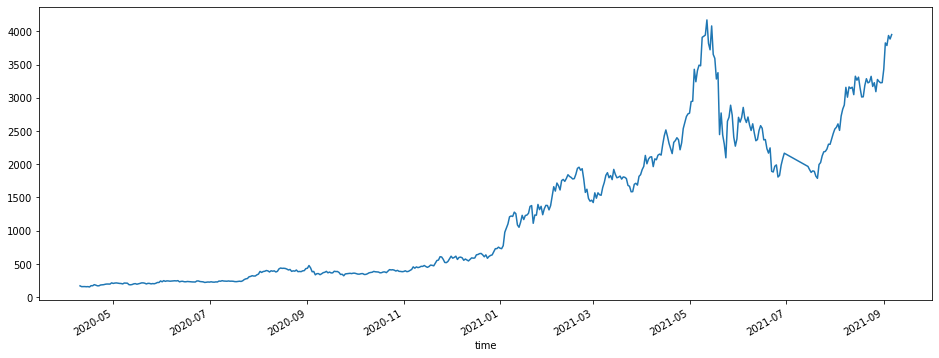

In [10]:
dataset['open'].plot(figsize=(16,6))

In [11]:
dataset.rolling(7).mean().head(20)

,open,close,high,low,volume
time,,,,,
2021-09-06,NaN,NaN,NaN,NaN,NaN
2021-09-05,NaN,NaN,NaN,NaN,NaN
2021-09-04,NaN,NaN,NaN,NaN,NaN
2021-09-03,NaN,NaN,NaN,NaN,NaN
2021-09-02,NaN,NaN,NaN,NaN,NaN
2021-09-01,NaN,NaN,NaN,NaN,NaN
2021-08-31,3721.485714,3821.128571,3872.114286,3651.512857,46679.662857
2021-08-30,3617.742857,3721.654286,3782.942857,3545.812857,43689.612857
2021-08-29,3526.414286,3617.897143,3684.000000,3448.555714,41016.827143


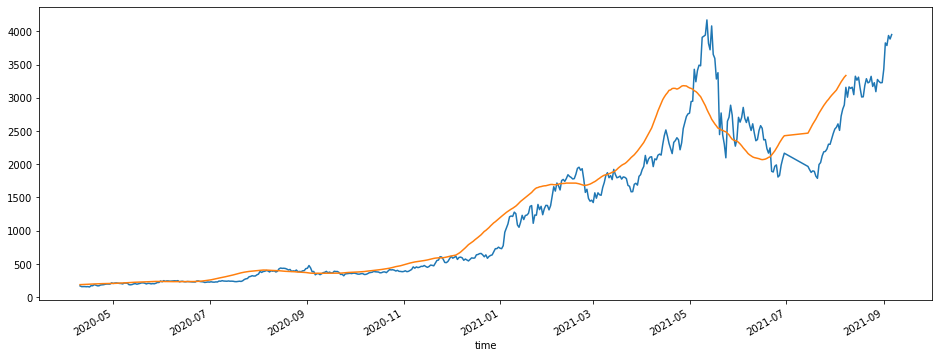

In [12]:
dataset['open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['close'].plot()

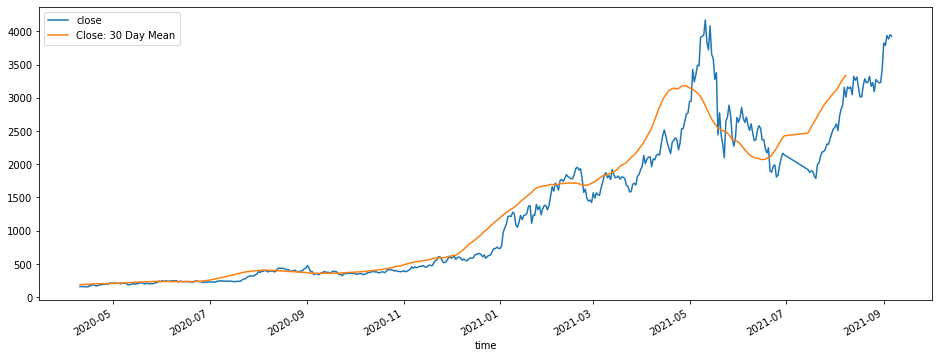

In [13]:
dataset['Close: 30 Day Mean'] = dataset['close'].rolling(window=30).mean()
dataset[['close', 'Close: 30 Day Mean']].plot(figsize=(16,6))

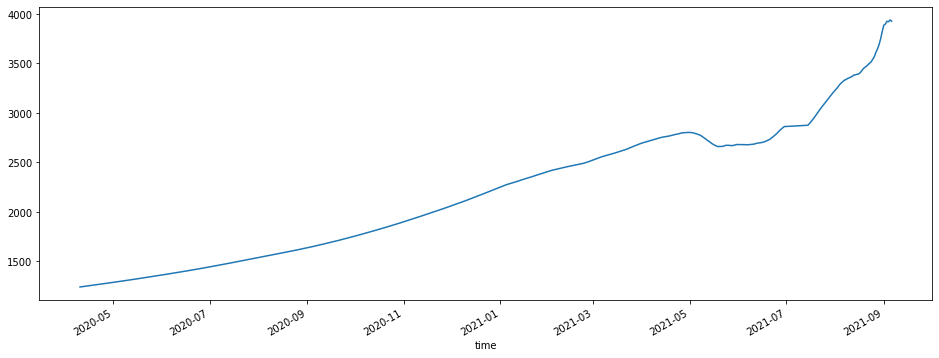

In [14]:
dataset['close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [15]:
training_set = dataset['open']
training_set = pd.DataFrame(training_set)

In [16]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range= (0, 1))
training_set_scaled = sc.fit_transform(training_set)

print(len(training_set_scaled))

500


In [17]:
x_train = []
y_train = []

for i in range(60, 500):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [18]:
eth_close_price = dataset.close.values.astype('float32')
print(eth_close_price)

[3927.2  3952.1  3884.4  3938.3  3787.6  3827.2  3431.1  3230.88 3225.8
 3245.8  3276.1  3092.68 3228.51 3173.2  3324.44 3240.7  3225.   3286.8
 3186.4  3015.4  3013.   3147.27 3312.4  3265.6  3324.8  3047.8  3163.
 3139.9  3164.4  3009.2  3158.3  2892.   2829.1  2726.1  2508.9  2607.3
 2557.3  2529.   2463.09 2384.2  2300.1  2304.3  2228.7  2192.7  2185.9
 2124.5  2025.3  1995.4  1787.8  1820.   1893.21 1900.86 1878.24 1919.7
 2142.4  2166.1  2083.8  1983.4  1833.3  1809.   1990.3  1970.32 1881.6
 1892.94 2246.51 2169.1  2234.5  2372.   2366.7  2541.6  2580.5  2508.49
 2368.7  2354.7  2470.7  2609.16 2508.63 2591.36 2710.1  2629.   2692.
 2855.7  2706.   2632.8  2705.4  2382.9  2272.7  2409.74 2740.9  2888.9
 2707.9  2647.7  2097.6  2302.1  2439.8  2773.9  2441.3  3378.6  3277.67
 3593.5  3651.9  4082.3  3722.8  3833.31 4172.7  3945.5  3926.   3911.7
 3481.49 3491.4  3348.7  3240.5  3427.3  2949.7  2943.8  2769.4  2758.6
 2536.9  2537.   2322.8  2218.6  2367.9  2399.3  2356.7  2329.9 

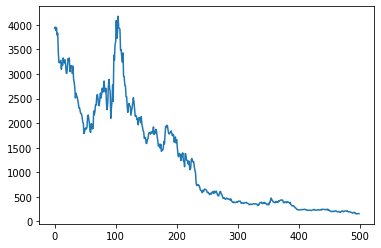

In [19]:
plt.plot(eth_close_price)
plt.show()


eth_close_price = eth_close_price.reshape(1, -1)
scaler = MinMaxScaler(feature_range=(0, 1))
eth_close_price = scaler.fit_transform(eth_close_price)

In [20]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# New Section

In [21]:
regressor = Sequential()

In [22]:
regressor.add(LSTM(units=50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences= True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences= True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [34]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(x_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
14/14 [==============================] - 8s 114ms/step - loss: 0.0034
Epoch 2/10
14/14 [==============================] - 2s 112ms/step - loss: 0.0026
Epoch 3/10
14/14 [==============================] - 2s 123ms/step - loss: 0.0020
Epoch 4/10
14/14 [==============================] - 2s 122ms/step - loss: 0.0027
Epoch 5/10
14/14 [==============================] - 2s 114ms/step - loss: 0.0027
Epoch 6/10
14/14 [==============================] - 2s 115ms/step - loss: 0.0022
Epoch 7/10
14/14 [==============================] - 2s 117ms/step - loss: 0.0029
Epoch 8/10
14/14 [==============================] - 2s 122ms/step - loss: 0.0028
Epoch 9/10
14/14 [==============================] - 2s 123ms/step - loss: 0.0025
Epoch 10/10
14/14 [==============================] - 2s 113ms/step - loss: 0.0021


In [37]:
regressor.save('/content/drive/MyDrive/ETH/eth.h5')

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
